In [16]:
import qcodes as qc
import numpy as np

import transitions
from importlib import reload
reload(transitions )
from transitions import *

In [17]:
data = qc.load_data('CSD/2018-03-26/#004_4D_DC_TGAC_DBL_DBR_14-51-19')
# data = qc.load_data('CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17')
data

DataSet:
   location = 'CSD/2018-03-26/#004_4D_DC_TGAC_DBL_DBR_14-51-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | DC_control_DFR_set  | DFR          | (3,)
   Setpoint | DC_control_DFL_set  | DFL          | (3, 3)
   Setpoint | DBL_DBR_set         | DBL_DBR      | (3, 3, 301)
   Setpoint | DC_control_TGAC_set | TGAC         | (3, 3, 301, 251)
   Measured | DC_voltage          | DC_voltage   | (3, 3, 301, 251)

In [18]:
# importing data
DB = data.DBL_DBR_set[1,1,:]
TGAC = data.DC_control_TGAC_set[1,1,1,:]
DC_voltage = data.DC_voltage[1,0,:,:] #change these values for different datasets
DC_voltage = np.swapaxes(DC_voltage,0,1)
#00 none 
#01 one clear
#02 three clear
#10 four clear
#11 five messy
#12 seven ok clarity. See this one for two transitions crossing clearly
#20 five messy at end
#21 six messy
#22 seven clearish

DB = DB[150:280]
TGAC = TGAC[0:125]
DC_voltage = DC_voltage[0:125,150:280]



# DB = data.DBL_DBR_set[1,1,:]
# TG = data.DC_control_TGAC_set[1,1,1,:]
# Z = data.DC_voltage[0,1,:,:] #change these values for different datasets
# Z = np.swapaxes(Z,0,1)
#00 none 
#01 one clear
#02 three clear
#10 four clear
#11 five messy
#12 seven ok clarity. See this one for two transitions crossing clearly
#20 five messy at end
#21 six messy
#22 seven clearish

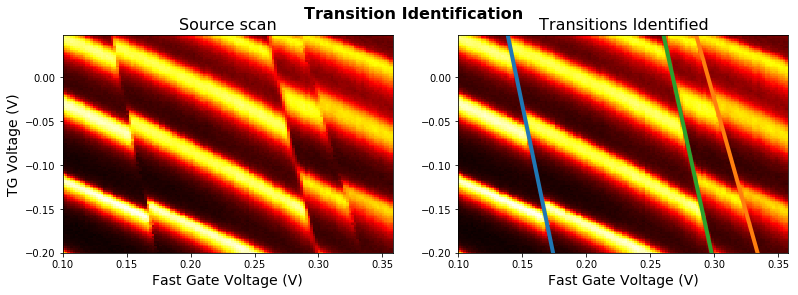

In [19]:
# DB = DBL_DBR gate voltage array
# TGAC = TGAC voltage array
# DC_voltage  = Charge stability diagram with axes [DB,TGAC]
find_transitions(DB,TGAC,DC_voltage,plot=True);

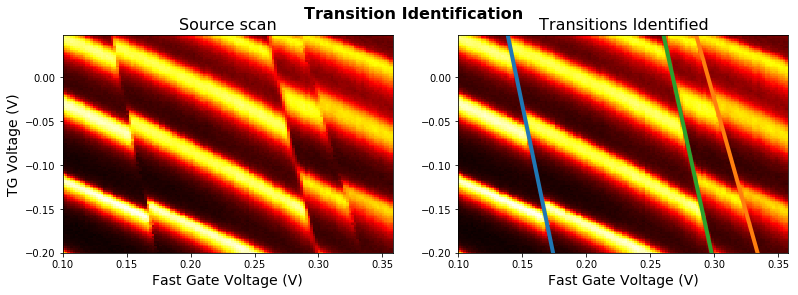

[{'dVtop': 0.016000000000000014,
  'gradient': -7.0000000000000488,
  'gradient_error': 5.9027777777777786,
  'intensity': 0.8181497829646055,
  'location': 0.17399999999999999},
 {'dVtop': 0.012000000000000011,
  'gradient': -5.1739130434782972,
  'gradient_error': 4.356060606060602,
  'intensity': 0.77731879466478193,
  'location': 0.33400000000000002},
 {'dVtop': 0.012000000000000011,
  'gradient': -6.611111111111156,
  'gradient_error': 5.5727554179566594,
  'intensity': 0.56845723964873407,
  'location': 0.29799999999999999}]

In [21]:
# from transitions import*
# DB = DBL_DBR gate voltage array
# TGAC = TGAC voltage array
# DC_voltage  = Charge stability diagram with axes [DB,TGAC]
transitions = find_transitions(DB, TGAC, DC_voltage, 
                               true_units=True, 
                               plot=True)
display(transitions)